## 위클리퀴즈 3주차

파일명을 3주차퀴즈_(성함)으로 변경 부탁드립니다.  
금일 11시 59분까지 문제 푸시고, 모두 실행 후 파일 제출해주시면 됩니다.

#### 1. Titanic 데이터를 불러와 첫 10개 행을 출력하새요.

seaborn 라이브러리를 이용해 Titanic 데이터를 불러옵니다.  
데이터의 첫 10개 행을 출력합니다.

In [1]:
# 기본 라이브러리 임포트
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


#### 2. 데이터의 결측치 개수를 확인하세요.

각 열의 결측치 개수를 출력합니다.

In [2]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### 3. 'who'열을 기준으로 'age'열의 평균을 계산하세요.

'who'열을 인덱스로 하여 'age'열의 평균을 계산한 피벗 테이블을 출력합니다.

In [33]:
mean_who_age = df.pivot_table(index='who',values='age')
mean_who_age.loc['child'].values[0].round(2)

np.float64(6.37)

#### 4. 'age'열의 결측치를 'who'열 기준 평균으로 대체하세요.

'age'열의 결측치를 'who'열 기준 'age'열의 평균으로 대체합니다.  
이 때, 평균값은 소수점 두 자리에서 반올림합니다.  
(힌트: 'who'열 기준 'age'열의 평균값이 담긴 시리즈를 만들어 결측치 대체에 사용합니다.)

'age'열의 남은 결측치 개수를 출력합니다.

In [ ]:
# 단순 대체
simple_data = df['age'].fillna(df['age'].mean().round(2))
print(simple_data.isna().sum())

# 'who'의 범주에 따라 대체하기
def fill_mean_age(row) :
    row = row.copy()
    mean_who_age = df.pivot_table(index='who',values='age')
    if pd.isnull(row['age']) :
        row['age'] = mean_who_age.loc[row['who']].values[0].round(2)
    return row

print("결측치 자료",df.iloc[5]['age'])
print(fill_mean_age(df.iloc[5])['age'])

df_age_fill = df.apply(fill_mean_age, axis=1)
df_age_fill

0
결측치 자료 nan
33.17


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,32.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### 5. 'age'열을 범주화하세요.

'age'열을 나이대로 범주화한 열을 데이터프레임에 추가합니다.  
나이대는 10s-, 10s, 20s, 30s, 40s, 50s, 60s+로 구분합니다.  
(참고로, 10s-는 10대 미만, 20s는 20세 이상 30세 미만, 60s+는 60세 이상입니다.)

각 나이대별 데이터의 개수를 출력합니다.

In [48]:
def categorical_age(row) :
    row = row.copy()
    if row['age'] <= 10:
        row['categorical_age'] = '10s-'
    elif row['age'] <= 20:
        row['categorical_age'] = '10s'
    elif row['age'] <= 30:
        row['categorical_age'] = '20s'
    elif row['age'] <= 40:
        row['categorical_age'] = '30s'
    elif row['age'] <= 50:
        row['categorical_age'] = '40s'
    elif row['age'] <= 60:
        row['categorical_age'] = '50s'
    else :
        row['categorical_age'] = '60s+'
    return row

print(categorical_age(df_age_fill.iloc[5])['categorical_age']) # ok
df_age_fill_category = df_age_fill.apply(categorical_age, axis=1)
df_age_fill_category

30s


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,categorical_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20s
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30s
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20s
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30s
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,20s
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10s
888,0,3,female,32.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,30s
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,20s


#### 6. 'sex'열과 5번 문제에서 만든 나이대 열을 기준으로 생존 확률을 계산하세요.

'sex'열을 인덱스로, 나이대 열을 컬럼으로 설정히여 생존 확률을 계산한 피벗 테이블을 출력합니다.

In [89]:
answer6 = df_age_fill_category.pivot_table(index='sex',columns='categorical_age', values='survived')
# answer6.columns, answer6.index
answer6

categorical_age,10s,10s-,20s,30s,40s,50s,60s+
sex,,,,,,,
female,0.739130,0.612903,0.753086,0.759259,0.677419,0.928571,1.000000
male,0.144928,0.575758,0.154362,0.174107,0.218182,0.142857,0.105263


#### 7. 'age'열과 6번 문제의 피벗 테이블을 시각화하세요.

두 개의 그래프를 동시에 출력합니다.  
첫 번째 그래프: 'age'열의 히스토그램을 그립니다.  
두 번째 그래프: 6번 문제에서 만든 피벗 테이블을 활용하여, x축은 나이대, y축은 생존 확률로 설정한 선형 그래프를 그립니다.  
이 그래프는 남녀별 생존 확률을 구분하여 출력합니다.

In [ ]:
import matplotlib.pyplot as plt
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs) -> 'Axes'
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of 

In [92]:
answer6.T.columns, answer6.T.index

(Index(['female', 'male'], dtype='object', name='sex'),
 Index(['10s', '10s-', '20s', '30s', '40s', '50s', '60s+'], dtype='object', name='categorical_age'))

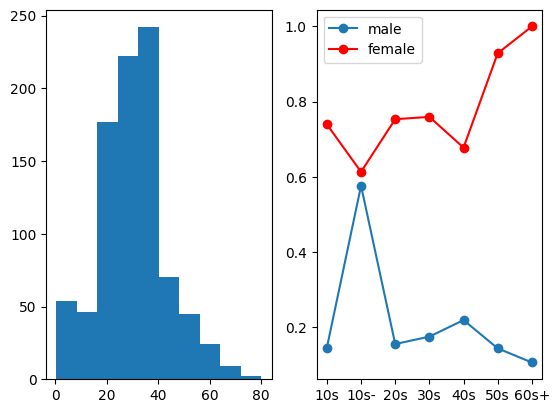

In [103]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(1,2,1)
ax1.hist(df_age_fill_category['age'])
ax2 = plt.subplot(1,2,2)
ax2.plot(answer6.T.index, answer6.T['male'],marker='o', label = 'male')
ax2.plot(answer6.T.index, answer6.T['female'],color='red',marker='o', label = 'female')
plt.legend()
plt.show()